# Запустите все ячейки (Ctrl + F9)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install typing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=810771db7e0de00becbf026b06adc1bd86a0e0bf256226ce68a998367e391782
  Stored in directory: /root/.cache/pip/wheels/9d/67/2f/53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
Successfully built typing


In [ ]:
from ultralytics import YOLO
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import typing
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Model airport_detection_fixed

# Подключение Google Drive
drive.mount('/content/drive')

# Проверка структуры датасета
print("Содержимое проекта:")
print(os.listdir('/content/drive/MyDrive/Project_CK'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Содержимое проекта:
['Копия yolo_visual_yolo11.ipynb', '.ipynb_checkpoints', 'saved_models', 'testing_models', 'ИАР', 'YOLO_detected', 'test.ipynb', 'only_8_yolo_train.ipynb', 'yolo_train.ipynb', 'yolo_visual.ipynb', 'yolo11.ipynb']


In [ ]:
# Загрузка модели
model_name = 'airport_yolov11'
model = YOLO(f'/content/drive/MyDrive/Project_CK/saved_models/airport/{model_name}//weights/epoch20.pt')

dir = '/content/drive/MyDrive/Project_CK/testing_models/test_files'
for photo in os.listdir(dir):
  if photo.endswith(".jpg"):
    results = model.predict(f"{dir}/{photo}", imgsz=(1024, 1024), conf=0.04)

    # Визуализация и сохранение
    print(photo)
    for r in results:
        im_array = r.plot()  # Массив numpy с разметкой
        cv2.imwrite(f"/content/drive/MyDrive/Project_CK/testing_models/predictions/{photo.split('.')[0]}_predictions.jpg", im_array)  # Сохранение в файл

        cv2_imshow(im_array)  # Отображение в Colab (замена cv2.imshow)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
file_name = "test_image_3_moscow__airport"
# Детекция на изображении
results = model.predict(f'/content/drive/MyDrive/Project_CK/testing_models/test_files/{file_name}.jpg', conf=0.09)
# print(len(results[0]))
# print(results[0][0])
print(results[0].boxes.conf)
print(results[0].boxes.xyxy)
# Визуализация и сохранение
for r in results:
    im_array = r.plot()  # Массив numpy с разметкой
    cv2.imwrite(f'/content/drive/MyDrive/Project_CK/testing_models/predictions/{file_name}_{model_name}_predictions.jpg', im_array)  # Сохранение в файл
    cv2_imshow(im_array)  # Отображение в Colab (замена cv2.imshow)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# results.head()

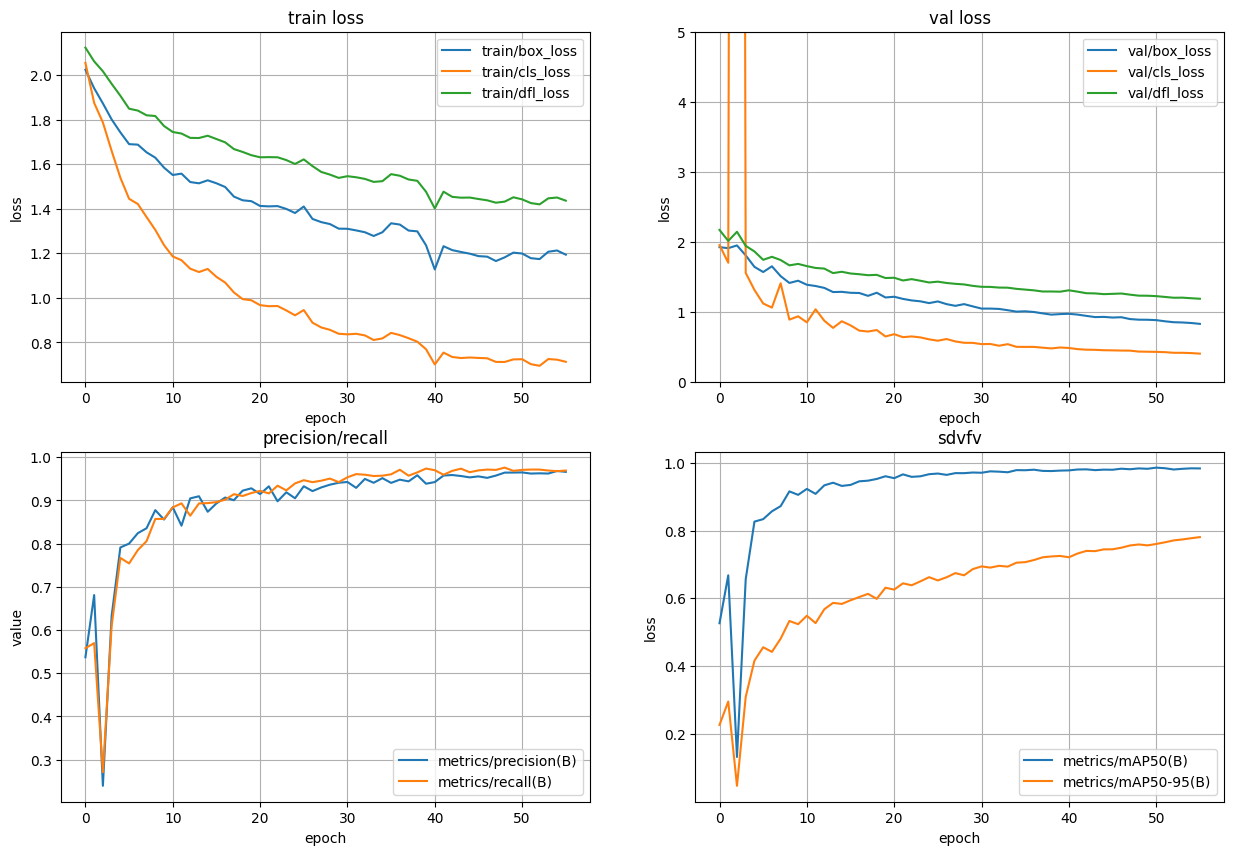

In [ ]:
fig: plt.Figure
axes: typing.List[typing.List[plt.Axes]]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

results = pd.read_csv('/content/drive/MyDrive/Project_CK/saved_models/airport/airport_yolov11/results.csv')

axes[0][0].plot(results.iloc[:, 2:5])
axes[0][0].legend(results.columns[2:5])
axes[0][0].set_title("train loss")
axes[0][0].set_ylabel("loss")
axes[0][0].set_xlabel("epoch")
axes[0][0].grid()


axes[0][1].plot(results.iloc[:, 9:12])
axes[0][1].legend(results.columns[9:12])
axes[0][1].set_title("val loss")
axes[0][1].set_ylabel("loss")
axes[0][1].set_xlabel("epoch")
axes[0][1].set_ylim((0, 5))
axes[0][1].grid()


axes[1][0].plot(results.iloc[:, 5:7])
axes[1][0].legend(results.columns[5:7])
axes[1][0].set_title("precision/recall")
axes[1][0].set_ylabel("value")
axes[1][0].set_xlabel("epoch")
axes[1][0].grid()


axes[1][1].plot(results.iloc[:, 7:9])
axes[1][1].legend(results.columns[7:9])
axes[1][1].set_title("mAP")
axes[1][1].set_ylabel("loss")
axes[1][1].set_xlabel("epoch")
axes[1][1].grid()

plt.title("sdvfv")
plt.show()
